<a href="https://colab.research.google.com/github/19830281062/git_huipu/blob/main/QuickDraw%E6%95%B4%E5%90%88.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
import tensorflow.keras as keras
import matplotlib.pyplot as plt
import tensorflow.keras.layers as layers
from random import randint
import cv2 as cv
%matplotlib inline
import datetime
import tensorflow as tf

In [3]:
import numpy as np
import os
import glob
import tqdm
from tqdm.std import trange

In [4]:
x = np.load('/content/drive/MyDrive/Colab Notebooks/深度学习实训/QuickDraw分类/data/apple.npy',allow_pickle=True)

In [6]:
x
print(x.shape)

(144722, 784)


# **1、dataAnalysis**

In [4]:
def loadData(oriPath,dstPath):
    allDatasetPath = glob.glob(os.path.join(oriPath,'*.npy'))

    x = np.empty([0,784])
    y = np.empty([0])

    classNames = []

    for idx in trange(len(allDatasetPath)):
        datasetPath = allDatasetPath[idx]
        data = np.load(datasetPath)
        data = data[0: 10000, :]
        labels = np.full(data.shape[0], idx)

        x = np.concatenate((x,data),axis=0)
        y = np.append(y,labels)

        className,ext = os.path.splitext(os.path.basename(datasetPath))
        classNames.append(className)

    data = None#清空内存
    labels = None

    permutation = np.random.permutation(y.shape[0])
    x = x[permutation, :]
    y = y[permutation]

    testLength = int(x.shape[0]/100*(0.2*100))
    xTest = x[0:testLength, :]
    yTest = y[0:testLength]
    xTrain = x[testLength:x.shape[0], :]
    yTrain = y[testLength:x.shape[0]]
    np.save(dstPath + '/xTrain.npy',xTrain)
    np.save(dstPath + '/yTrain.npy',yTrain)
    np.save(dstPath + '/xTest.npy',xTest)
    np.save(dstPath + '/yTest.npy',yTest)
    print(classNames)

In [5]:
loadData('/content/drive/MyDrive/Colab Notebooks/深度学习实训/QuickDraw分类/data','/content/drive/MyDrive/Colab Notebooks/深度学习实训/QuickDraw分类/tmp')

100%|██████████| 10/10 [00:43<00:00,  4.32s/it]


['book', 'bed', 'door', 'cup', 'apple', 'hamburger', 'sun', 'banana', 'key', 'foot']


# **2、dataProcessing**

In [6]:
xTrain = np.load('/content/drive/MyDrive/Colab Notebooks/深度学习实训/QuickDraw分类/tmp/xTrain.npy')
yTrain = np.load('/content/drive/MyDrive/Colab Notebooks/深度学习实训/QuickDraw分类/tmp/yTrain.npy')
xTest = np.load('/content/drive/MyDrive/Colab Notebooks/深度学习实训/QuickDraw分类/tmp/xTest.npy')
yTest = np.load('/content/drive/MyDrive/Colab Notebooks/深度学习实训/QuickDraw分类/tmp/yTest.npy')

In [7]:
labelSets = ['book', 'bed', 'door', 'cup', 'apple', 'hamburger', 'sun', 'banana', 'key', 'foot']
numClasses = len(labelSets)

sun


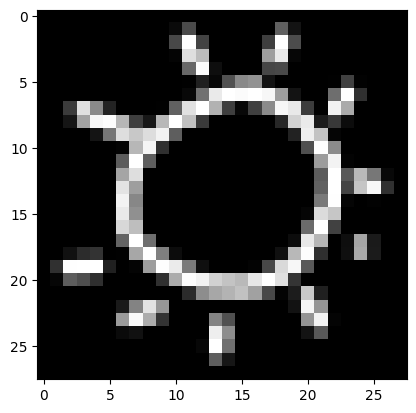

---------------------------
key


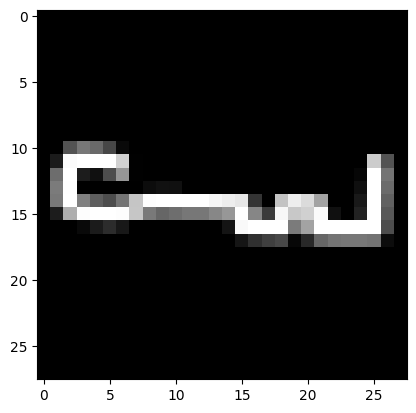

In [12]:
index = randint(0,len(xTrain))
print(labelSets[int(yTrain[index])])
trainSingleImage = xTrain[index].reshape(28,28)
cv.imwrite('/content/drive/MyDrive/Colab Notebooks/深度学习实训/QuickDraw分类/tmp/test1.png',trainSingleImage)
plt.imshow(trainSingleImage,cmap='gray')
plt.show()

print('---------------------------')
index = randint(0,len(xTest))
print(labelSets[int(yTest[index])])
testSingleImage = xTest[index].reshape(28,28)
cv.imwrite('/content/drive/MyDrive/Colab Notebooks/深度学习实训/QuickDraw分类/tmp/test2.png',testSingleImage)
plt.imshow(testSingleImage,cmap='gray')
plt.show()

In [13]:
xTrain = xTrain.reshape(xTrain.shape[0],28,28,1).astype('float32')
xTest = xTest.reshape(xTest.shape[0],28,28,1).astype('float32')

In [ ]:
xTrain.shape
xTrain[0]

array([[[  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.]],

       [[  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [ 44.],
        [ 78.],
        [106.],
        [110.],
        [ 58.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.]],

       [[  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
    

In [14]:
xTrain /= 255.0
xTest /= 255.0

In [15]:
yTrain = keras.utils.to_categorical(yTrain,numClasses)
yTest = keras.utils.to_categorical(yTest,numClasses)#独热编码

In [16]:
print(xTrain[0])
print('-------')
print(yTrain[0])
print('-------')
print(xTest[0])
print('-------')
print(yTest[0])

[[[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.23137255]
  [0.46666667]
  [0.46666667]
  [0.22352941]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0. 

In [17]:
np.save('/content/drive/MyDrive/Colab Notebooks/深度学习实训/QuickDraw分类/tmp/xTrainFinal.npy',xTrain)
np.save('/content/drive/MyDrive/Colab Notebooks/深度学习实训/QuickDraw分类/tmp/yTrainFinal.npy',yTrain)
np.save('/content/drive/MyDrive/Colab Notebooks/深度学习实训/QuickDraw分类/tmp/xTestFinal.npy',xTest)
np.save('/content/drive/MyDrive/Colab Notebooks/深度学习实训/QuickDraw分类/tmp/yTestFinal.npy',yTest)

In [18]:
np.load('/content/drive/MyDrive/Colab Notebooks/深度学习实训/QuickDraw分类/tmp/xTrainFinal.npy').shape

(80000, 28, 28, 1)

# **3、training_1**

In [19]:
xTrain = np.load('/content/drive/MyDrive/Colab Notebooks/深度学习实训/QuickDraw分类/tmp/xTrainFinal.npy')
yTrain = np.load('/content/drive/MyDrive/Colab Notebooks/深度学习实训/QuickDraw分类/tmp/yTrainFinal.npy')
xTest = np.load('/content/drive/MyDrive/Colab Notebooks/深度学习实训/QuickDraw分类/tmp/xTestFinal.npy')
yTest = np.load('/content/drive/MyDrive/Colab Notebooks/深度学习实训/QuickDraw分类/tmp/yTestFinal.npy')

In [20]:
xTrain.shape

(80000, 28, 28, 1)

In [21]:
xTest.shape

(20000, 28, 28, 1)

In [41]:
xTrain[2].shape

(28, 28, 1)

In [22]:
model = keras.Sequential()
model.add(layers.Convolution2D(16,(3,3),padding='same',input_shape=xTrain.shape[1:],activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Convolution2D(32,(3,3),padding='same',activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Convolution2D(64,(3,3),padding='same',activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(128,activation='relu',kernel_regularizer=keras.regularizers.l2(0.001)))
model.add(keras.layers.Dropout(0.75))
model.add(layers.Dense(10,activation='softmax'))

# Corrected model definition
# model = keras.Sequential([
#     layers.Conv2D(16, kernel_size=(3, 3), padding='same', input_shape=xTrain.shape[1:], activation='relu'),
#     layers.MaxPooling2D(pool_size=(2, 2)),
#     layers.Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu'),
#     layers.MaxPooling2D(pool_size=(2, 2)),
#     layers.Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu'),
#     layers.MaxPooling2D(pool_size=(1, 1)),
#     layers.Flatten(),
#     layers.Dense(128, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
#     keras.layers.Dropout(0.75),
#     layers.Dense(numClasses, activation='softmax')
# ])

adam = keras.optimizers.Adam()
model.compile(loss=keras.losses.categorical_crossentropy,optimizer=adam,metrics=[keras.metrics.categorical_accuracy])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 7, 7, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 3, 3, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 98,442 (384.54 KB)

 Trainable params: 98,442 (384.54 KB)

 Non-trainable params: 0 (0.00 B)

In [24]:
logDir = "/content/drive/MyDrive/Colab Notebooks/深度学习实训/QuickDraw分类/logs/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboardCallback = tf.keras.callbacks.TensorBoard(log_dir=logDir,histogram_freq=1)

In [25]:
trainDataTensor = tf.constant(xTrain)
trainLabelTensor = tf.constant(yTrain)
testDataTensor = tf.constant(xTest)
testLabelTensor = tf.constant(yTest)

In [26]:
trainDatasets = tf.data.Dataset.from_tensor_slices((trainDataTensor,trainLabelTensor))
testDatasets = tf.data.Dataset.from_tensor_slices((testDataTensor,testLabelTensor))##一一对应，组成数据可迭代对象

In [27]:
trainDatasets = trainDatasets.batch(64)
trainDatasets = trainDatasets.prefetch(tf.data.experimental.AUTOTUNE)
testDatasets = testDatasets.batch(64)
testDatasets = testDatasets.prefetch(tf.data.experimental.AUTOTUNE)

In [28]:
history = model.fit(x = trainDatasets,validation_data=testDatasets,epochs=10,callbacks=[tensorboardCallback])

Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - categorical_accuracy: 0.6148 - loss: 1.2882 - val_categorical_accuracy: 0.9014 - val_loss: 0.4271
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - categorical_accuracy: 0.8549 - loss: 0.5928 - val_categorical_accuracy: 0.9226 - val_loss: 0.3395
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - categorical_accuracy: 0.8812 - loss: 0.4892 - val_categorical_accuracy: 0.9283 - val_loss: 0.3119
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - categorical_accuracy: 0.8951 - loss: 0.4371 - val_categorical_accuracy: 0.9342 - val_loss: 0.2957
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - categorical_accuracy: 0.9054 - loss: 0.4005 - val_categorical_accuracy: 0.9365 - val_loss: 0.2786
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - categorical_accuracy: 0.9101 - loss: 0.3812 - val_categorical_accuracy: 0.9392 - val_loss: 0.2703
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - categorical_ac

创新1

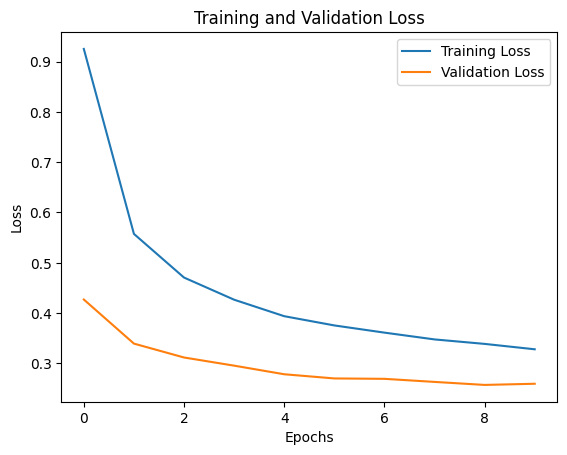

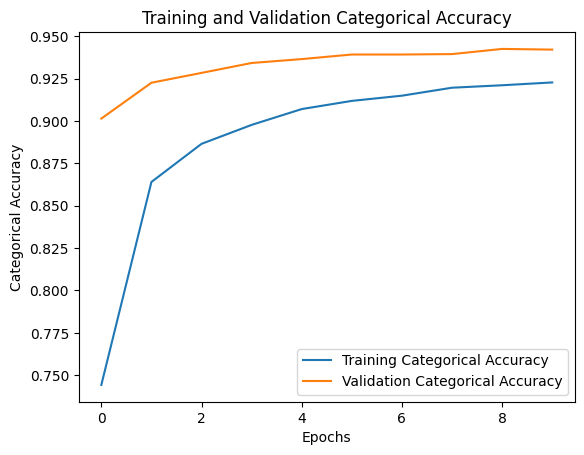

In [29]:

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# 绘制 categorical_accuracy 曲线
plt.plot(history.history['categorical_accuracy'], label='Training Categorical Accuracy')
plt.plot(history.history['val_categorical_accuracy'], label='Validation Categorical Accuracy')
plt.title('Training and Validation Categorical Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Categorical Accuracy')
plt.legend()
plt.show()

In [30]:
model.save('/content/drive/MyDrive/Colab Notebooks/深度学习实训/QuickDraw分类/models/model_quickdraw_1.h5')

In [31]:
labelSets = ['book', 'bed', 'door', 'cup', 'apple', 'hamburger', 'sun', 'banana', 'key', 'foot']
with open('/content/drive/MyDrive/Colab Notebooks/深度学习实训/QuickDraw分类/className.txt','w') as fileHandler:
    for item in labelSets:
        fileHandler.write("{}\n".format(item))

# **4、predicting**

In [32]:
def getLabels():
    class_names = []
    with open('/content/drive/MyDrive/Colab Notebooks/深度学习实训/QuickDraw分类/className.txt','r') as file_handler:
        for item in file_handler.readlines():
            class_names.append("{}".format(item[:len(item)-1]))
    return class_names

In [33]:
image = cv.imread('/content/drive/MyDrive/Colab Notebooks/深度学习实训/QuickDraw分类/tmp/test1.png',cv.IMREAD_GRAYSCALE)
image = cv.resize(image,(28,28))
image = image / 255.0
image = np.reshape(image,[28,28,1])
image = np.expand_dims(image,axis=0)

image2 = cv.imread('/content/drive/MyDrive/Colab Notebooks/深度学习实训/QuickDraw分类/tmp/test2.png',cv.IMREAD_GRAYSCALE)
image2 = cv.resize(image2,(28,28))
image2 = image2 / 255.0
image2 = np.reshape(image2,[28,28,1])
image2 = np.expand_dims(image2,axis=0)

In [34]:
model = tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/深度学习实训/QuickDraw分类/models/model_quickdraw_1.h5')
labels = getLabels()
pred = model.predict(image)
print(labels[np.argmax(pred[0])])
pred = model.predict(image2)
print(labels[np.argmax(pred[0])])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 491ms/step
sun
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
key


# **5、**